#Electricity Cosumption Forcasting Model
## Name - Rishit Gupta
## Project Mentor - Sibi Manickam


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

### Data Loading
---

The code contain loading the dataset "**AEP_hourly.csv**" to understand its structure and content.

It prints the first and last five rows to give a quick overview of the data.

then uses **`df.info()`** to display information about the dataset, such as column names, data types, and the number of non-null entries, helping to identify any initial issues with the data.

Descriptive statistics are generated using **`df.describe()`**, providing summary metrics like mean and standard deviation for numerical columns.

Finally, it checks for missing values with **`df.isnull().sum()`**, highlighting any data gaps that need to be addressed before further analysis or modeling.

---

In [ ]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")
print(df.tail(5),"\n")
print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

                   Datetime   AEP_MW
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.

#Preprocessing
## Reformat the Date Time Columns
---
The code extracts and adds several time-related features to the dataset for more detailed analysis. It converts the 'Datetime' column to datetime format and then extracts the month, year, date, time, week number, and day name from each timestamp.

These new features are added as separate columns in the DataFrame. The '**Datetime**' column is then set as the index of the DataFrame, ensuring it is in datetime format for better time series analysis and manipulation.

---

In [ ]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

AEP_MW  Month  Year        Date      Time  Week     Day
Datetime                                                                     
2004-12-31 01:00:00  13478.0     12  2004  2004-12-31  01:00:00    53  Friday

---
The code determines the number of unique years present in the dataset by first printing the unique years using **`df.Year.unique()`**.

It then counts the total number of these unique years with **`df.Year.nunique()**`. This helps in understanding the time span covered by the dataset, providing insights into the temporal range of the data and aiding in the planning of time series analysis and forecasting models.

---

In [ ]:
# How many Unique Year do we Have in Dataset
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



---
The code sets up a line plot to visualize energy consumption over time using Matplotlib and Seaborn. It first configures the plot style to **'ggplot'** for a clean and visually appealing look.

 A figure and subplot are created, and Seaborn's **`lineplot`** function is used to plot the data, with the x-axis representing the year and the y-axis showing energy consumption in megawatts (MW).

  The grid is enabled for easier data interpretation, and a legend is included to identify the data series. This visualization helps in understanding trends and patterns in energy consumption over the years.

  ---

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

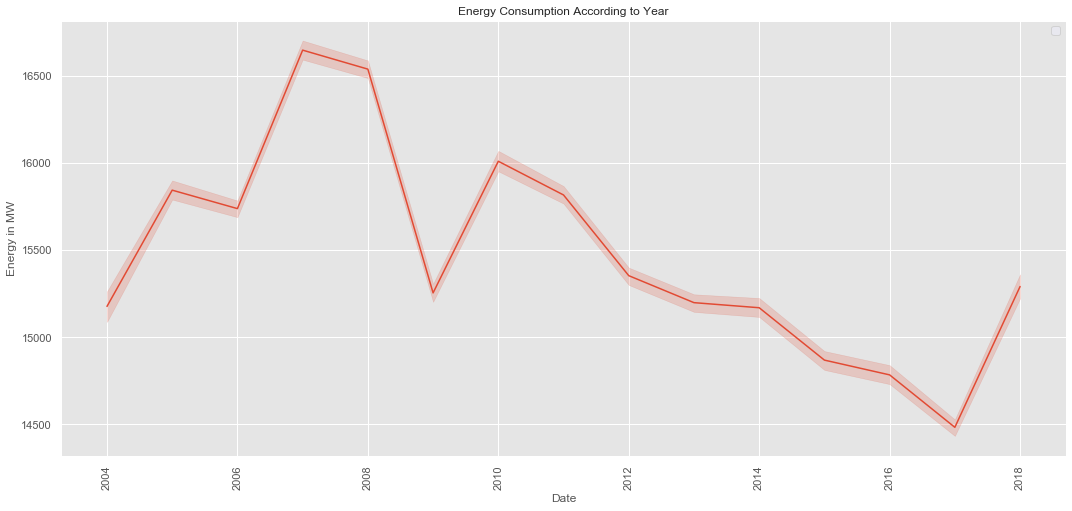

In [ ]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

---
This code creates a multi-plot figure to visualize energy consumption for the years 2004, 2005, and 2006. Using Matplotlib, it sets up three subplots **(`ax1`, `ax2`, `ax3`)** stacked vertically within the same figure.

 The **`ggplot`** style is used for a consistent and aesthetically pleasing appearance. For each year, it extracts the corresponding dates and energy consumption values, then plots these on their respective subplots with green lines of varying widths.

 This visualization helps compare and analyze the energy consumption trends across different years individually.

---

No handles with labels found to put in legend.


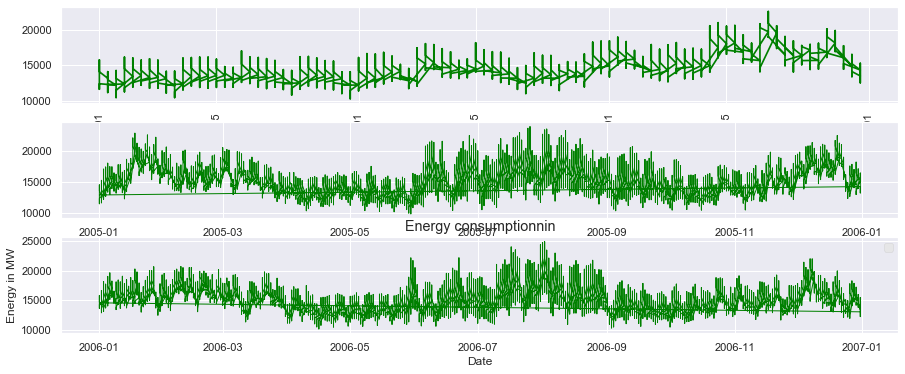

In [ ]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset["2004"]["AEP_MW"].to_list()
x_2004 = dataset["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset["2005"]["AEP_MW"].to_list()
x_2005 = dataset["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset["2006"]["AEP_MW"].to_list()
x_2006 = dataset["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

## Energy Distribution

---
This code uses Seaborn's **`distplot`** function to create a distribution plot of the 'AEP_MW' column, which represents energy consumption in megawatts (MW).

This plot visualizes the distribution of energy consumption values, showing how frequently each value occurs. The **`plt.title`** function adds a title "Energy Distribution" to the plot, providing context.

This distribution plot helps in understanding the spread, central tendency, and variability of the energy consumption data.

---

Text(0.5, 1.0, 'Ennergy Distribution')

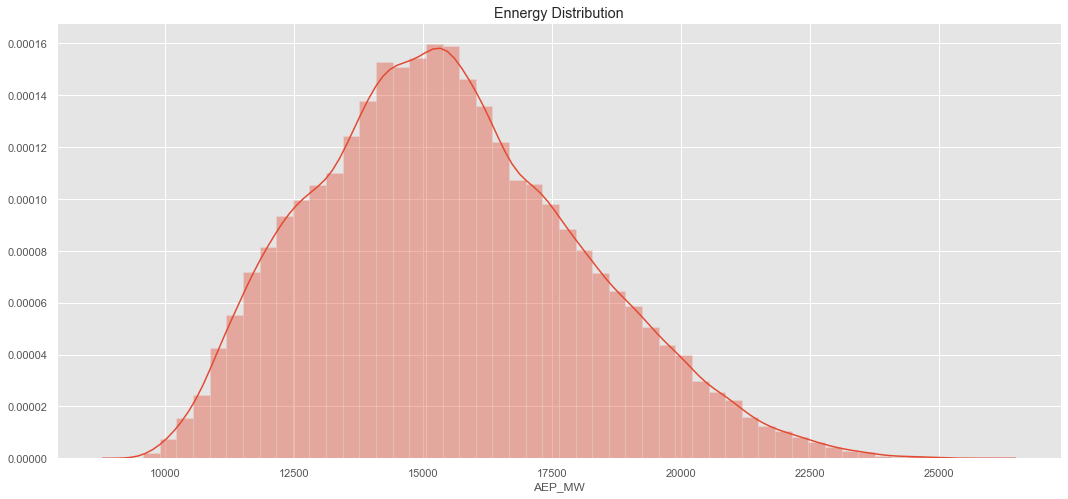

In [ ]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

In [ ]:
pd.plotting.register_matplotlib_converters()

## Energy with Respect to Time
---
This code creates a line plot to visualize the relationship between time of day and energy consumption.

Using Matplotlib, it sets up a figure and a single subplot **(`ax1`)**. Seaborn's `lineplot` function plots the **'Time'** on the x-axis and **'AEP_MW'** (energy consumption in megawatts) on the y-axis. The plot is titled **"Energy Consumption vs Time"** and includes x-axis labeling for clarity.

 This visualization helps in understanding how energy consumption varies throughout the day.

---

No handles with labels found to put in legend.


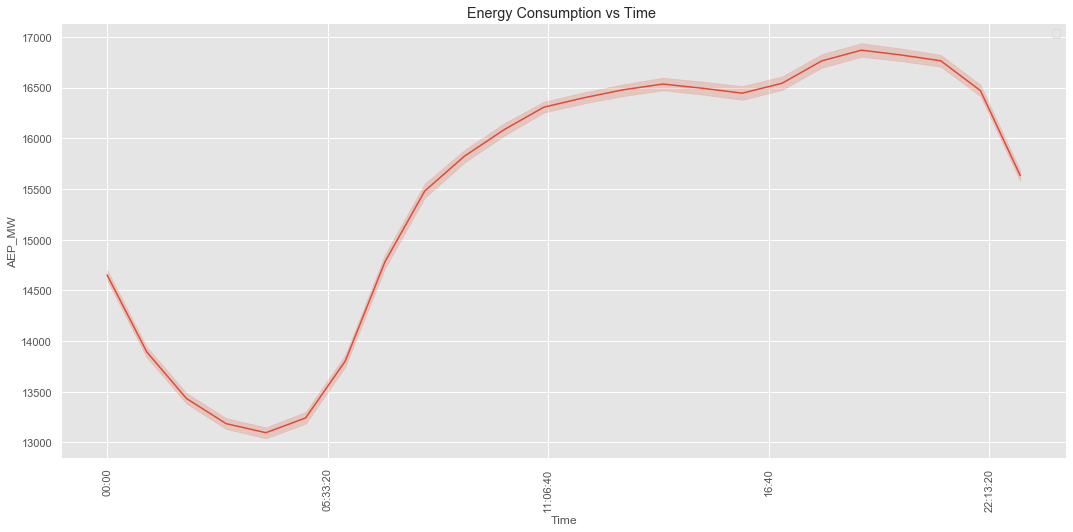

In [ ]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"],y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

## Resampleing Data
---
This code resamples the dataset to a daily frequency, calculating the mean energy consumption for each day. By resampling the data to a daily frequency, the dataset is aggregated, and the hourly energy consumption values are averaged for each day.

This transformation simplifies the data, making it easier to analyze long-term trends and patterns in daily energy consumption, and reduces the noise present in the hourly data.

The resulting **`NewDataSet`** contains the mean daily energy consumption values.

---

In [ ]:
NewDataSet = dataset.resample('D').mean()

---
Print Old and New Dataset Shape

---

In [ ]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


---
This code splits the resampled dataset into training and test sets for model development and evaluation. It first creates **`TestData`** by taking the last 100 days of the **`NewDataSet`**, which will be used to test the model's performance.

The **`Training_Set`** is then defined by selecting all rows and the first column (energy consumption data) of **`NewDataSet`**.

---

In [ ]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

---
Print Training and Test set Shapes

---

In [ ]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


---
The Training_Set.values attribute extracts the underlying numpy array from the Pandas DataFrame. By passing this to the type function, you can determine the type of this array.

---

In [ ]:
type(Training_Set.values)

numpy.ndarray

## Normalization
---
This code normalizes the Training_Set data to a range between 0 and 1 using the **MinMaxScaler** from the sklearn.preprocessing module.

---

In [ ]:
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

##  LSTM (Long Short-Term Memory)
---
This code constructs the training data for a sequence-based model by generating input-output pairs from the normalized data. It creates sequences of 60 time steps as inputs (**X_Train**) and the subsequent value as the target output (**Y_Train**). These sequences are iterated through a loop and collected in lists, which are then converted to numpy arrays for efficient processing.

---

In [ ]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):

    # X_Train 0-59
    X_Train.append(Train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


 ---
 Shape should be Number of [Datapoints , Steps , 1 )

 we convert into 3-d Vector or 3rd Dimension

 ---

In [ ]:

X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

## Model
---
This code constructs an LSTM-based RNN for time series forecasting. It builds a sequential model with four LSTM layers, each having 50 units, and interspersed with dropout layers to prevent overfitting.

The first three LSTM layers return sequences to the next layer, while the fourth does not, as it's the final LSTM layer. The network concludes with a dense layer that outputs the prediction.

The model is compiled using the **Adam optimizer** and mean squared error as the loss function, preparing it for training on the prepared sequence data.

---

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

---
This code trains the LSTM-based RNN model on the prepared training data with 50 epochs and a batch size of 32.

The fit method iterates over the training dataset 50 times, adjusting the model weights to minimize the loss function. Each iteration processes 32 samples at a time, which balances the reliability of gradient estimation and training speed.

This training step aims to enable the model to learn the patterns in the sequence data and make accurate future predictions.

---

In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
155/155 [==============================] - 22s 141ms/step - loss: 0.0231
Epoch 2/50
155/155 [==============================] - 21s 133ms/step - loss: 0.0183
Epoch 3/50
155/155 [==============================] - 22s 142ms/step - loss: 0.0173
Epoch 4/50
155/155 [==============================] - 20s 127ms/step - loss: 0.0165
Epoch 5/50
155/155 [==============================] - 21s 137ms/step - loss: 0.0158
Epoch 6/50
155/155 [==============================] - 21s 133ms/step - loss: 0.0154
Epoch 7/50
155/155 [==============================] - 20s 131ms/step - loss: 0.0144
Epoch 8/50
155/155 [==============================] - 19s 123ms/step - loss: 0.0120
Epoch 9/50
155/155 [==============================] - 21s 132ms/step - loss: 0.0105
Epoch 10/50
155/155 [==============================] - 19s 124ms/step - loss: 0.0097
Epoch 11/50
155/155 [==============================] - 20s 126ms/step - loss: 0.0087
Epoch 12/50
155/155 [==============================] - 19s 122ms/step - lo

## Test Data

In [ ]:
TestData.head(2)

AEP_MW  Month  Year  Week
Datetime                                   
2018-04-26  13157.791667      4  2018    17
2018-04-27  12964.000000      4  2018    17

In [ ]:
TestData.shape

(100, 4)

In [ ]:
NewDataSet.shape

(5055, 4)

In [ ]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [ ]:
Df_Total.shape

(5155, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

---
This code prepares the test data for the trained LSTM model by selecting the relevant data portion, reshaping and normalizing it.

 It then creates sequences of 60 time steps each, converts these sequences into a format suitable for the LSTM model, and uses the model to make predictions.

  Finally, it transforms the predicted values back to the original scale using the inverse of the normalization process. This allows for an accurate evaluation of the model's performance on the test data by comparing predicted values with actual values in the original scale.

  ---

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

---
This code extracts the true and predicted energy consumption values along with the corresponding dates for the test period. The actual values are taken from the test set and converted to a list (**True_MegaWatt**), while the predicted values from the model are assigned to **Predicted_MegaWatt**.

The dates associated with these values are also extracted as a list (dates).

---

In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

---
This code constructs a new DataFrame named **Machine_Df** to facilitate comparison between the true and predicted energy consumption values.

This DataFrame includes three columns: "**Date**" for the corresponding dates, "**TrueMegaWatt**" for the actual energy consumption values, and "PredictedMeagWatt" for the model's predicted values.

---

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

## Future Predicted


In [ ]:
Machine_Df

Date  TrueMegaWatt  PredictedMeagWatt
0  2018-04-26  13157.791667       13587.247070
1  2018-04-27  12964.000000       13193.769531
2  2018-04-28  12237.583333       14818.534180
3  2018-04-29  12156.791667       13431.833984
4  2018-04-30  13443.500000       13167.028320
..        ...           ...                ...
95 2018-07-30  15368.083333       15459.435547
96 2018-07-31  15180.291667       15838.257812
97 2018-08-01  15151.166667       15078.677734
98 2018-08-02  15687.666667       15076.901367
99 2018-08-03  14809.000000       15545.951172

[100 rows x 3 columns]

---
This code prepares to evaluate the model's performance by extracting and converting the necessary data. It converts the actual energy consumption values from the test set into a list **(True_MegaWatt**), flattens the predicted values from the model into a list (**Predicted_MegaWatt**), and extracts the corresponding dates into a list (**dates**).


---

In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

---
This code visualizes the comparison between true and predicted energy consumption values by plotting them over the same time period. The true values are plotted in **green**, while the predicted values are plotted in **red**.

 The x-axis represents the dates, and the y-axis represents power in megawatts.

---

No handles with labels found to put in legend.


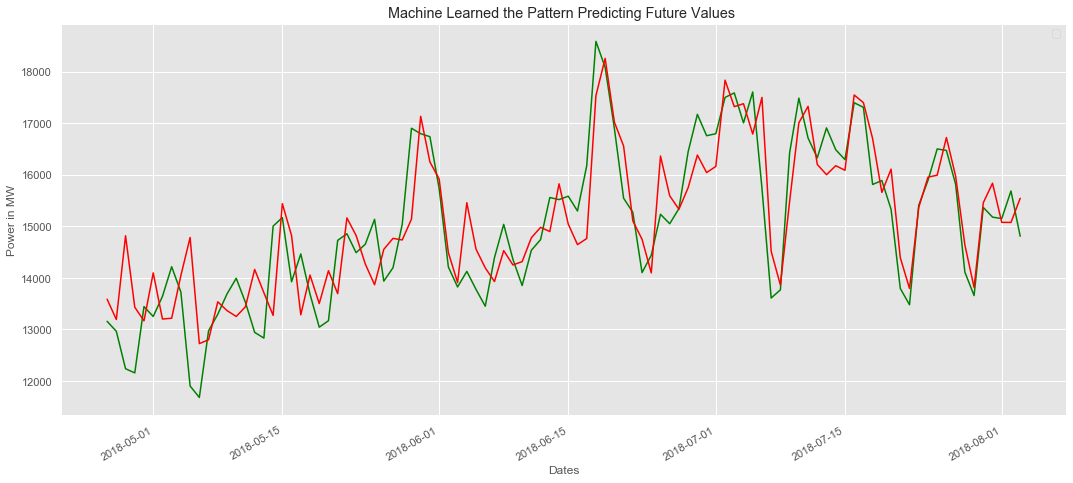

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()